<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100


In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #первоначально талица имела странный вид, воспользовалась разделителем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Приведя таблицу  к читаемому виду, мы видим множество столбцов с пропусками, столбец is_apartment нужно перевести в булев тип. Перед непосредственным анализом нам нужно заполнить пропуски и удалить дубликаты. Всего у нас 23699 записи.  По ряду признаков есть аномальные значения.

## Предобработка данных

Первый столбец с пропусками - это столбец с высотой потолков. Я решила посмотреть на него через визуализацию.

<AxesSubplot:>

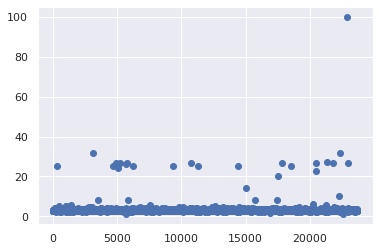

In [3]:
df['ceiling_height'].plot(style='o')

Очевидно, что есть некоторые выбросы, в виде потолков в 1 метр, или 100 метров. Это либо какая-то уникальная жилплощадь, либо опечатка. Но таких данных очень мало, так что логично было бы заполнить пропуски медианным значением. 

In [4]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') #первоначально талица имела странный вид, воспользовалась разделителем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
# Приводим в целочисленный тип стоимость квартиры
df['last_price'] = df['last_price'].astype(int)
# Приводим к типу даты дату публикации
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Выясняем количество значений в аппартаментах. Всего аппартаменты - 50. Заменяем пропущенные значения на нет
df['is_apartment'] = df['is_apartment'].fillna(value=False)
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0
df['balcony'] = df['balcony'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
df['parks_around3000'] = df['parks_around3000'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
df['ponds_around3000'] = df['ponds_around3000'].fillna(value=0).astype(int)

# Смотрим количество пропущенных значений
df.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Удаляем записи, где отсутствует локация и этажность
df.dropna(subset=['locality_name'], inplace=True)
df.dropna(subset=['floors_total'], inplace=True)

# Приводим этажность к целочисленному типу
df['floors_total'] = df['floors_total'].astype(int)

# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
df['ceiling_height'] = df.groupby(['locality_name', 'floors_total'])['ceiling_height'].apply(lambda x: x.fillna(x.median()))
df['ceiling_height'].fillna(df['ceiling_height'].median(), inplace=True)

# Заменяем пустые значения жилой площади и площади кухни
living_ratio = df['living_area'].mean() / df['total_area'].mean()
kitchen_ratio = df['kitchen_area'].mean() / df['total_area'].mean()
df['living_area'].fillna(living_ratio * df['total_area'], inplace=True)
df['kitchen_area'].fillna(kitchen_ratio * df['total_area'], inplace=True)

# Проверяем количество пропущенных значений
df.isnull().sum()

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

In [7]:
df_transformed = df.groupby('kitchen_area')['rooms'].transform('mean')#заполняем пропуски в столбце kitchen_area
 
df['kitchen_area'] = df['kitchen_area'].fillna(df_transformed)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

## Расчёты и добавление результатов в таблицу

In [8]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и меняем тип столбца с float на int
df['sm_price'] = df['last_price'] / df['total_area']
df['sm_price'] = df['sm_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года, как указано в задании
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

# Добавляем столбец с отношением жилой площади к общей (area_ratio), переводим в % и меняем тип столбца с float на int
df['area_ratio'] = df['living_area'] / df['total_area'] * 100
df['area_ratio'] = df['area_ratio'].fillna(value=0).astype(int)

# Добавляем столбец с отношением площади кухни к общей (kitchen_ratio), переводим в % и меняем тип столбца с float на int
df['kitchen_ratio'] = df['kitchen_area'] / df['total_area'] * 100
df['kitchen_ratio'] = df['kitchen_ratio'].fillna(value=0).astype(int)

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_group, axis=1)



## Исследовательский анализ данных

<b>1. Изучение основных параметров

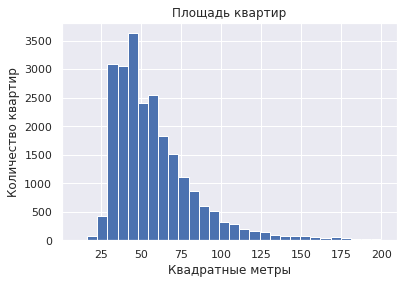

Наибольшие по площади варианты:
19540   900.00
12859   631.20
3117    631.00
15651   618.00
5358    590.00
4237    517.00
8018    507.00
15016   500.00
5893    500.00
12401   495.00
Name: total_area, dtype: float64


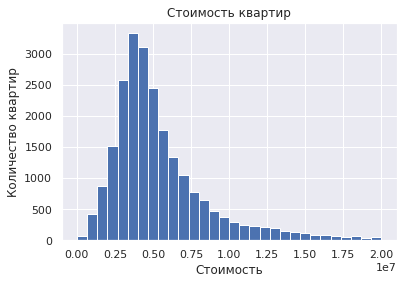

Наибольшие по цене варианты:
12971    763000000
19540    420000000
14706    401300000
1436     330000000
15651    300000000
22831    289238400
16461    245000000
13749    240000000
5893     230000000
8900     190870000
Name: last_price, dtype: int64


In [9]:
# Изучаем площадь квартир
plt.hist(df['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(df['total_area'].sort_values(ascending=False).head(10))

# Изучаем стоимость квартир
plt.hist(df['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(df['last_price'].sort_values(ascending=False).head(10))

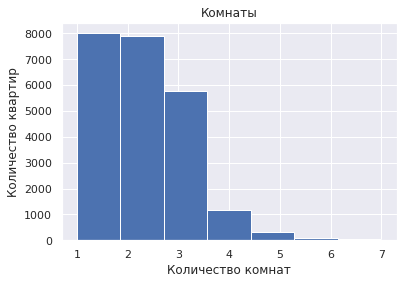

Наибольшие по числу комнат варианты:
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
648      11
9688     11
18891    10
18119    10
Name: rooms, dtype: int64


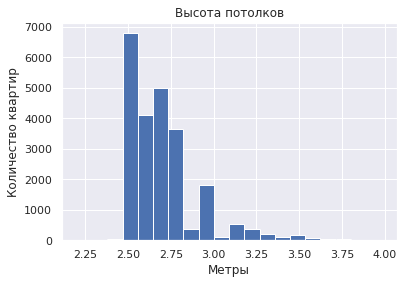

Наибольшие по высоте потолков варианты:
22869   100.00
22336    32.00
3148     32.00
21377    27.50
20478    27.00
5246     27.00
10773    27.00
21824    27.00
5807     27.00
4876     27.00
Name: ceiling_height, dtype: float64


In [10]:
# Изучаем количество комнат
plt.hist(df['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по числу комнат варианты:')
print(df['rooms'].sort_values(ascending=False).head(10))

# Изучаем высоту потолков
plt.hist(df.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по высоте потолков варианты:')
print(df['ceiling_height'].sort_values(ascending=False).head(10))

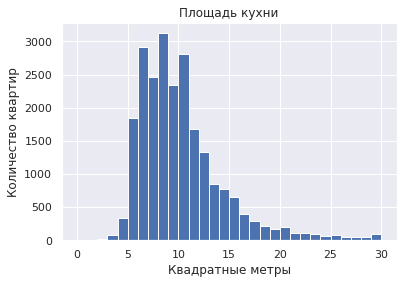

Наибольшие по площади кухни варианты:
19540   112.00
20215   107.00
2489    100.70
5358    100.00
16239    93.20
16797    93.00
15016    87.54
10867    87.20
9826     86.50
492      77.00
Name: kitchen_area, dtype: float64


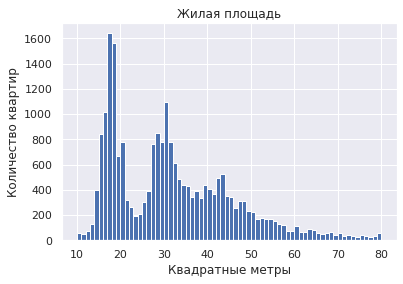

Наибольшие по жилой площади варианты:
19540   409.70
5358    409.00
3117    360.41
12401   347.50
4237    332.00
12859   322.30
660     312.50
8018    301.50
14088   300.00
5893    285.59
Name: living_area, dtype: float64


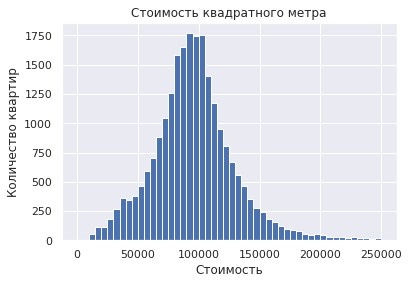

Наибольшие по цене за квадрат варианты:
12971    1907500
1436     1736842
22831    1542604
14706    1000748
4996      995983
16461     857542
4859      848484
17172     848484
16647     841379
17912     813253
Name: sm_price, dtype: int64


In [11]:
# Изучаем площадь кухни
plt.hist(df['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(df['kitchen_area'].sort_values(ascending=False).head(10))

# Изучаем жилую площадь
plt.hist(df['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(df['living_area'].sort_values(ascending=False).head(10))

# Изучаем цену за квадрат
plt.hist(df['sm_price'], bins=50, range=(0,250000))
plt.title('Стоимость квадратного метра')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене за квадрат варианты:')
print(df['sm_price'].sort_values(ascending=False).head(10))

Изучив данные наглядно через графики, я пришла к выводу, что большая часть квартир площадью менее 100 квадратных метров. Но есть несколько квартир с аномальной площадью больше 200 метров, считаю их выбросами.
В основном квартиры стоят около 5 миллионов. Но, также как и с площадью, есть квартиры с аномально высокой стоимостью более 20 миллионов.
Чаще всего квартиры - это однушки, двушки и трешки. Есть небольшая доля 4-комнатных квартир. Но также встречаются квартиры, где есть больше семи комнат. 
В большинстве квартир потолки высотой от 2,5 до 3 метров.Высота потолков более 4-х метров выглядит странно. Есть значения в 27 метров и даже в 100 - это может быть опечаткой.
Самый распространённый вариант кухни - это помещения размером от 5 до 15 квадратных метров. Кухни площадью более 20 метров практически не встречаются.
Ну и самые часто встречающиеся варианты квартир - с жилой площадью от 10 до 50 метров. После 80 метров встречаются единичные случаи. Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.
Квадратный метр в, среднем, стоит около 100 тыс., распределение на графике нормальное.

<b>2. Изучение времени продажи квартиры

Время продажи (медиана): 95 

Время продажи (среднее): 181 



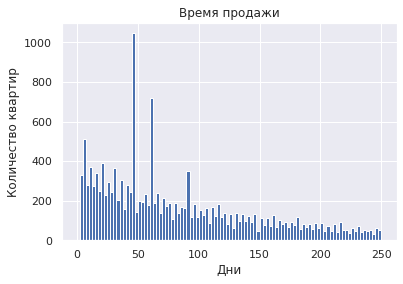

In [12]:
# Отбрасываем маркеры пустых значений
print('Время продажи (медиана):', round(df.query('days_exposition != 8888')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(df.query('days_exposition != 8888')['days_exposition'].mean()),'\n')
# Гистограма времени продажи
plt.hist(df.query('days_exposition != 8888')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()


После изучения графиков, можно увидеть, что медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок около 100 дней. Есть большое число квартир, проданных всего за несколько дней 
после публикации. А также есть варианты, которые продавались несколько лет.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 230 дней (7,5 месяцев) и дольше.

<b>3. Работа с аномалиями

In [13]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

# Столбцы с выбросами
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    df[col] = quartile_range(df, col)

# Меняем тип столбца 'rooms' с float на int 
df['rooms'] = df['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sm_price,weekday,month,year,area_ratio,kitchen_ratio
count,"23,565.00","21,519.00","22,326.00","23,565.00","21,837.00","23,565.00","22,682.00","23,565.00","22,250.00","23,565.00","18,041.00","18,064.00","23,565.00","8,030.00","23,565.00","9,036.00","18,721.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00","23,565.00"
mean,9.88,"4,837,114.55",54.32,2.01,2.66,10.68,31.53,5.88,9.42,0.59,"28,797.08","14,192.66",0.47,490.58,0.59,518.29,128.30,"99,405.39",2.57,6.40,"2,017.37",56.10,18.14
std,5.68,"2,215,773.61",19.33,0.99,0.14,6.59,13.75,4.87,3.18,0.96,"12,632.50","8,613.35",0.75,341.57,0.88,278.01,121.06,"50,389.44",1.79,3.49,1.04,10.11,6.96
min,0.00,"12,190.00",12.00,0.00,2.25,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00,111.00,0.00,1.00,"2,014.00",2.00,2.00
25%,6.00,"3,300,000.00",39.40,1.00,2.55,5.00,18.70,2.00,7.00,0.00,"18,565.00","9,238.00",0.00,288.00,0.00,293.00,41.00,"76,566.00",1.00,3.00,"2,017.00",50.00,13.00
50%,9.00,"4,400,000.00",50.00,2.00,2.64,9.00,30.00,4.00,9.00,0.00,"26,757.00","13,096.50",0.00,455.00,0.00,503.00,85.00,"95,000.00",3.00,6.00,"2,017.00",57.00,17.00
75%,14.00,"5,999,999.50",65.50,3.00,2.75,16.00,40.60,8.00,11.00,1.00,"37,273.00","16,285.00",1.00,612.00,1.00,730.00,182.00,"114,213.00",4.00,10.00,"2,018.00",63.00,22.00
max,50.00,"11,866,860.00",114.20,5.00,3.05,60.00,76.70,33.00,19.45,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00",509.00,"1,907,500.00",6.00,12.00,"2,019.00",100.00,78.00


Я отбросила значения на основе 1.5 размаха, для избавления от аномальных выбросов.

<b>4. Определение факторов, влияющих на стоимость квартиры

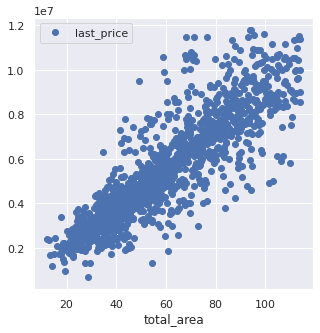

Корреляция цены и площади: 

            last_price  total_area
last_price        1.00        0.91
total_area        0.91        1.00 



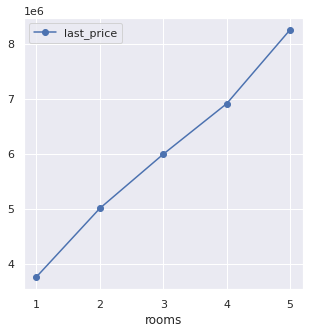

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00   0.54
rooms             0.54   1.00 



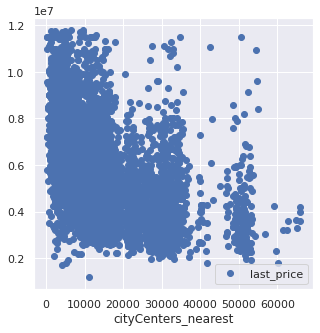

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.71
last_price                          0.71        1.00 



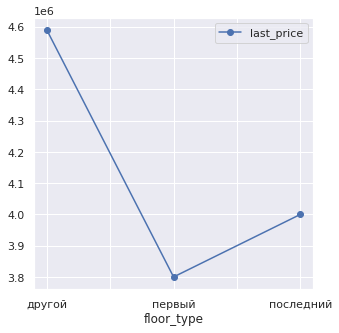

In [14]:
# Зависимость цены от площади
(
    df.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(df.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от числа комнат
(
    df.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от удалённости от центра
(
    df.pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(df.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    df.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

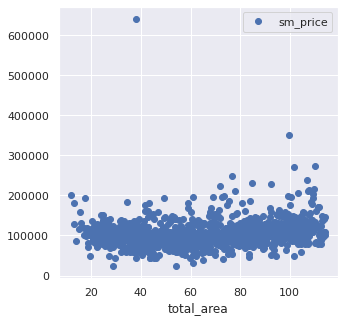

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price        1.00        0.05
total_area      0.05        1.00 



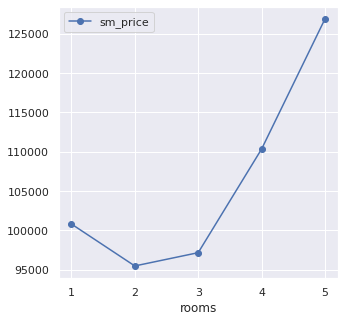

Корреляция цены за квадрат и числа комнат: 

          rooms  sm_price
rooms      1.00     -0.26
sm_price  -0.26      1.00 



In [15]:
# Зависимость цены за квадрат от площади
(
    df.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(df.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    df.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(df.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

После выведения графиков с корреляцией стало очевидно, что чем больше площадь, тем выше стоимость (ну это логично). Корреляция этих параметров крайне высокая. Число комнат влияет на цену (больше комнат - больше цена), но зависимость между этиит факторами ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко.

Самые дорогие варианты квартир находятся в центре города, однако в центре также есть и достаточно дешёвые варианты.

Первый этаж очень сильно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных посередине.

Цена за квадрат выше у однокомнатных квартир и квартир с 4 и 5 комнатами. Последнее, вероятно, объясняется элитностью недвижимости.

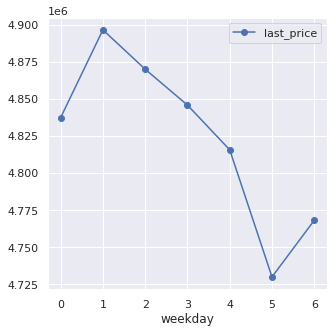

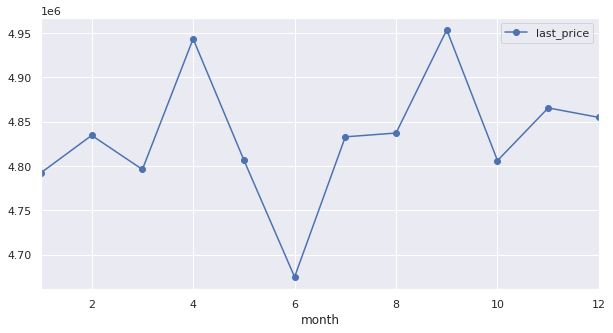

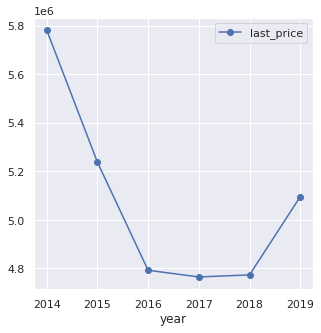

In [16]:
# Зависимость от дня размещения
(
    df.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    df.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    df.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Из графиков мы ясно видим, что дороже всего квартиры, объявления о продаже которых опубликованы в среду, 
дешевле всего - в субботу.
Дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
И очевидно, что квартиры очень сильно подешевели в 2016-2018 годах, 
а в 2019 году цены снова стали повышаться.

<b>5. Сравнение средней стоимости квадратного метра в первой десятке городов

In [17]:
# Сравниваем среднюю стоимость квадратного метра в первой десятке городов по числу объявлений
city_top = df['locality_name'].value_counts().head(10)
city_top_price = df.query('locality_name in (@city_top.index)').pivot_table(values='sm_price', index='locality_name')
city_top_price = city_top_price.astype(int)
city_top_price.sort_values('sm_price', ascending=False)

,sm_price
locality_name,
Санкт-Петербург,114868
Пушкин,103125
деревня Кудрово,92473
посёлок Парголово,90175
посёлок Мурино,85672
посёлок Шушары,78550
Колпино,75424
Гатчина,68745
Всеволожск,68654


Самая высокая средняя стоимость квадратного метра,разумеется, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся окраинами Санкт-Петербургом или непосредственно к нему примыкающие. Из первой десятки наименьшая стоимость квадратного метра в Выборге, Гатчине и Всеволожске, расположенных на большом расстоянии от Санкт-Петербурга.

<b>6. Определяем границу центральной зоны

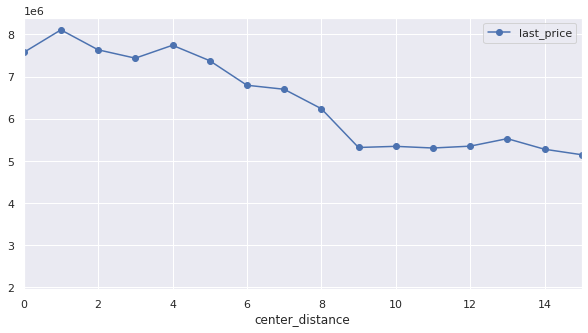

In [18]:
# Добавляем столбец с расстоянием до центра в км, округляем до целого
df['center_distance'] = df['cityCenters_nearest'] / 1000
df['center_distance'] = df['center_distance'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    df.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='center_distance', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show()


Центральная зона - это расстояние от центра до 7 км и меньше. Далее средняя цена на квартиры резко снижается.

<b>7. Анализ недвижимости в центре

Площадь (медиана): 52 

Площадь в центре (медиана): 68 

Площадь (средняя): 56 

Площадь в центре (средняя): 69 



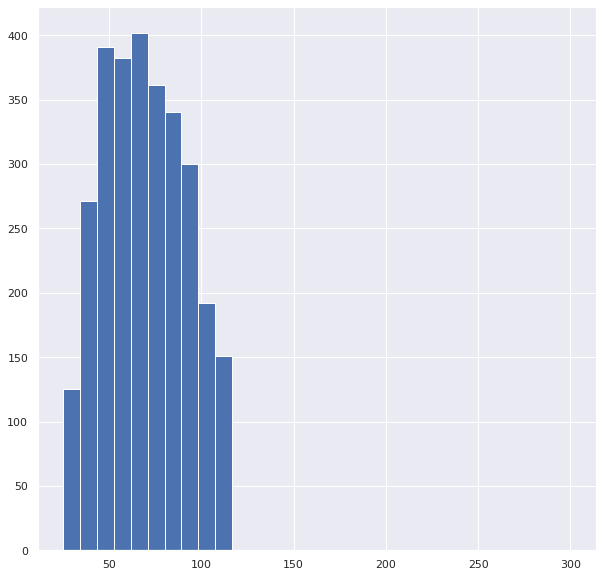

Число вариантов с ценой больше 20 млн: 0


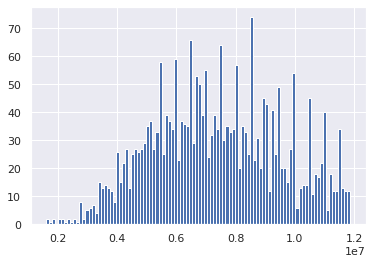

,count,rooms_ratio,center_count,center_rooms_ratio,center_cap
rooms,,,,,
1,4912,31.99,579,16.16,12.00
2,5082,33.09,1119,31.24,22.00
3,4107,26.74,1161,32.41,28.00
4,966,6.29,503,14.04,52.00
5,290,1.89,220,6.14,76.00


Высота потолков (медиана): 2.65 

Высота потолков в центре (медиана): 2.77 

Высота потолков (средняя): 2.679183579335793 

Высота потолков в центре (средняя): 2.790674381484437 



In [19]:
spb_center = df.query('(locality_name == "Санкт-Петербург") & (center_distance <= 7)')

# Изучаем площадь
print('Площадь (медиана):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].median()),'\n')
print('Площадь в центре (медиана):', round(spb_center['total_area'].median()),'\n')
print('Площадь (средняя):', round(df.query('locality_name == "Санкт-Петербург"')['total_area'].mean()),'\n')
print('Площадь в центре (средняя):', round(spb_center['total_area'].mean()),'\n')
spb_center['total_area'].hist(bins=30, range=(25,300), figsize=(10,10))
plt.show()

# Изучаем стоимость
spb_center['last_price'].hist(bins=100)
print('Число вариантов с ценой больше 20 млн:', spb_center.query('last_price > 20000000')['last_price'].count())
plt.show()

# Изучаем число комнат
spb_rooms = df.query('(locality_name == "Санкт-Петербург") & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms.columns = ['count']
spb_rooms['rooms_ratio'] = spb_rooms['count'] / spb_rooms['count'].sum() * 100
spb_rooms_center = df.query('(locality_name == "Санкт-Петербург") & (center_distance <= 7)  & (rooms > 0)').pivot_table(index='rooms', values='floor', aggfunc='count')
spb_rooms_center.columns = ['center_count']
spb_rooms_center['center_rooms_ratio'] = spb_rooms_center['center_count'] / spb_rooms_center['center_count'].sum() * 100
rooms_alldf = pd.merge(spb_rooms, spb_rooms_center, 'left', on = 'rooms')
rooms_alldf['center_cap'] = round(rooms_alldf['center_count'] / rooms_alldf['count'] * 100)
display(rooms_alldf)

# Изучаем высоту потолков
print('Высота потолков (медиана):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].median(),'\n')
print('Высота потолков в центре (медиана):', spb_center['ceiling_height'].median(),'\n')
print('Высота потолков (средняя):', df.query('locality_name == "Санкт-Петербург"')['ceiling_height'].mean(),'\n')
print('Высота потолков в центре (средняя):', spb_center['ceiling_height'].mean(),'\n')

Средняя площадь квартир в центре значительно больше, чем в целом по городу - примерно на 13-14 метров. 
Также в центре находится большое число квартир с аномальной площадью (100 квадратных метров и более).
В центре доля однокомнатных квартир в два раза ниже (16 %), чем в среднем по городу (32 %). 
Половина четырёхкомнатных квартир находится в центре города (52 %), их доля в два раза выше, 
чем в среднем по городу (6 %). Большинство квартир с аномальным количеством комнат (5 комнат и более)
находятся в центре города.
Высота потолков в центре выше в среднем на 12 сантиметров.

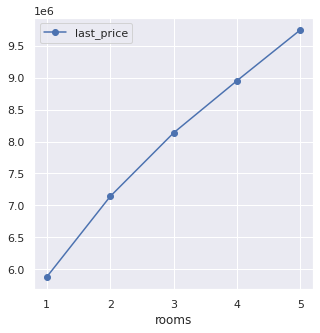

Корреляция цены и числа комнат: 

            last_price  rooms
last_price        1.00  -0.14
rooms            -0.14   1.00 



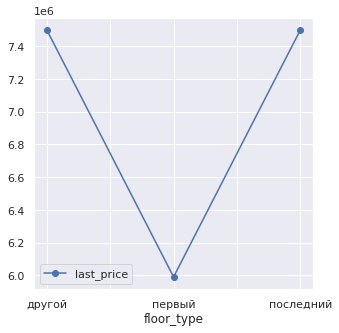

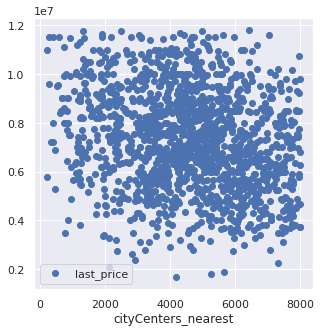

Корреляция цены и удалённости от центра: 

                     cityCenters_nearest  last_price
cityCenters_nearest                 1.00        0.12
last_price                          0.12        1.00 



In [20]:
# Зависимость цены от числа комнат
(
    spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(spb_center.query('(rooms > 0) & (rooms < 7)').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

# Зависимость цены от этажа
(
    spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

# Зависимость цены от удалённости от центра
(
    spb_center.pivot_table(index='cityCenters_nearest', values='last_price', aggfunc='median')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и удалённости от центра:','\n')
print(spb_center.pivot_table(index='floor', values=['cityCenters_nearest', 'last_price']).corr(),'\n')

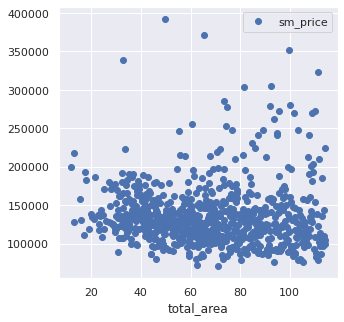

Корреляция цены за квадрат и площади: 

            sm_price  total_area
sm_price        1.00       -0.01
total_area     -0.01        1.00 



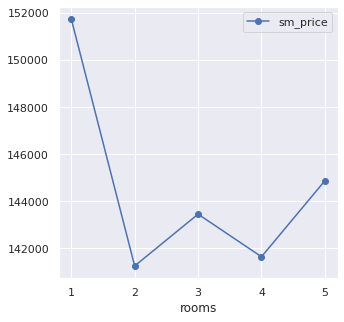

Корреляция цены за квадрат и числа комнат: 

          rooms  sm_price
rooms      1.00     -0.05
sm_price  -0.05      1.00 



In [21]:
# Зависимость цены за квадрат от площади
(
    spb_center.pivot_table(index='total_area', values='sm_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и площади:','\n')
print(spb_center.pivot_table(index='floor', values=['total_area', 'sm_price']).corr(),'\n')

# Зависимость цены за квадрат от числа комнат
(
    spb_center.query('rooms > 0').pivot_table(index='rooms', values='sm_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены за квадрат и числа комнат:','\n')
print(spb_center.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'sm_price']).corr(),'\n')

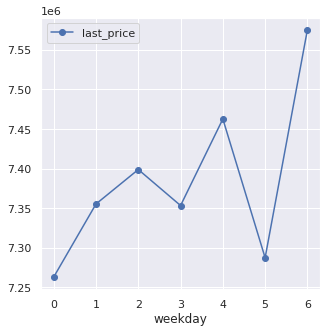

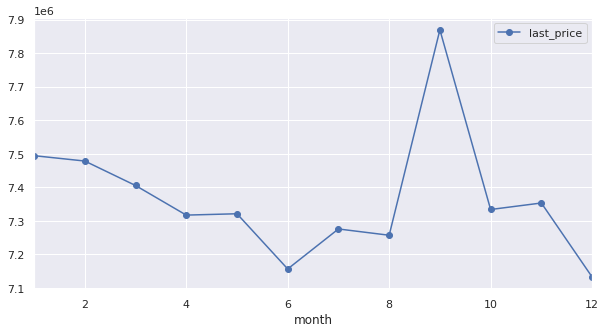

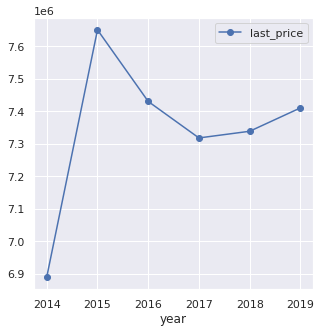

In [22]:
# Зависимость от дня размещения
(
    spb_center.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    spb_center.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    spb_center.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Проанализировав недвижимость в центре Санкт-Петербурга, я выяснила, что зависимость цены квартиры от числа комнат
в центре примерно такая же, как и в целом по городу
В центре верхний этаж стоит практически столько же, сколько и другие этажи, кроме первого
В центральной зоне почти нет зависимости от удалённости от центра города. 
В центре есть очень дорогие однокомнатные квартиры
В центре значительно выше стоимость квартир, опубликованных в субботу и в декабре 
(вероятно, растет спрос перед Новым годом)
Стоимость квартир в центре значительно выросла в 2015 году и снизилась только в 2017 году.

## Общий вывод

Я пришла к выводу, что на стоимость больше влияет площадь квартиры, чем число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.
Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации.
Также есть варианты, которые продавались несколько лет.

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

В центре города практически нет разницы, насколько квартира удалена от условного центра города, но центр ограничен .
В центре города последний этаж практически не влияет на стоимость квартиры, в отличие от остального города.
В центре есть очень дорогие однокомнатные квартиры
Экономическая ситуация в стране мало влияет на элитную недвижимость в центре

<div class="alert alert-block alert-warning">
<b>Комментатор ревьюера 2 ⚠️: </b> Хороший проект, спасибо за приложенные усилия не смотря на жизненные трудности) У нас остался всего один момент, который надо поправить (заполнения пропусков в days_exposition), чтобы двигаться дальше, давай сделаем его!) Также буду рад, если прокомментируешь, что ты хотела сделать в ячейке, код которой не исполняется, возможно я смогу помочь и объяснить)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>Спасибо огромное за твое мнения и за качественную проверку, извини что в таком виде в первый раз прислала проект. Вроде все поправила, буду ждать ответ.</div>

<div class="alert alert-block alert-success">
<b>Итоговый комментарий ревьюера ✔️:</b> Супер, теперь все на своем месте, можно идти дальше!) Успехов в дальнейшем обучении, верю, что все получится!)
</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [х]  файлы изучены (выведены первые строки, метод `info()`)
- [х]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [х]  изменены типы данных
- [х]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: «Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?»
- [x]  выполнено задание: «Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили».
- [ ]  выполнено задание: «Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года». 
- [ ]  выполнено задание: «Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце `locality_name`».
- [ ]  выполнено задание: «Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (`locality_name`). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона».
- [ ]  выполнено задание: «Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?»
- [ ]  в каждом этапе есть выводы
- [ ]  есть общий вывод